**Imports**

In [1]:
import pandas as pd
import numpy as np
import geopandas as geo
import matplotlib.pyplot as plt
import urllib.request
import datetime as dt

In [2]:
# set display widht and length

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
# read in cmc data

data = pd.read_csv('~/Hack_the_Bay/Data/Water_FINAL.csv', low_memory=False)

In [4]:
data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Unnamed: 0.1,2143,2145,2147,2151,2152
Agency,NaN,NaN,NaN,NaN,NaN
BiasPC,NaN,NaN,NaN,NaN,NaN
CloudCover,NaN,NaN,NaN,NaN,NaN
Comments,NaN,NaN,NaN,NaN,NaN
Cruise,NaN,NaN,NaN,NaN,NaN
Database,CMC,CMC,CMC,CMC,CMC
Date,04/28/2018,04/28/2018,04/28/2018,04/28/2018,04/28/2018
FieldActivityEventType,NaN,NaN,NaN,NaN,NaN


In [8]:
data['StationCode'].unique()

array(['FB.FOBBT01', 'FB.FOBBT02', 'FB.FOBBT03', ..., 'TUPMP.CALFRI002',
       'TUPMP.EADRBR001', nan], dtype=object)

In [5]:
data.shape

(2708717, 73)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2708717.0,1.354358e+06,7.819394e+05,0.000000e+00,6.771790e+05,1.354358e+06,2.031537e+06,2.708716e+06
Unnamed: 0.1,2708717.0,2.214989e+06,1.525271e+06,0.000000e+00,8.509090e+05,2.185441e+06,3.530615e+06,4.897264e+06
FieldActivityRemark,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GaugeHeight,99773.0,1.086185e+01,3.531412e+02,-2.900000e-01,2.210000e+00,3.210000e+00,5.190000e+00,3.550000e+04
HUC12,2444456.0,2.070009e+10,9.915505e+07,2.040303e+10,2.060002e+10,2.070011e+10,2.080105e+10,2.080208e+10
Latitude,2708717.0,3.843319e+01,1.000394e+00,3.674004e+01,3.763189e+01,3.839600e+01,3.899748e+01,4.280672e+01
Longitude,2708717.0,-7.658405e+01,6.551539e-01,-8.043708e+01,-7.686761e+01,-7.640131e+01,-7.617466e+01,-7.483524e+01
LowerPycnocline,424435.0,1.131874e+01,5.302668e+00,7.000000e-01,7.000000e+00,1.050000e+01,1.450000e+01,3.050000e+01
MeasureValue,2708717.0,1.490216e+01,7.579417e+01,-1.400000e+01,1.000400e+00,7.700000e+00,1.333000e+01,2.977700e+04
PrecisionPC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2708717 entries, 0 to 2708716
Data columns (total 73 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   Unnamed: 0                               int64  
 1   Unnamed: 0.1                             int64  
 2   Agency                                   object 
 3   BiasPC                                   object 
 4   CloudCover                               object 
 5   Comments                                 object 
 6   Cruise                                   object 
 7   Database                                 object 
 8   Date                                     object 
 9   FieldActivityEventType                   object 
 10  FieldActivityRemark                      float64
 11  FlowStage                                object 
 12  GaugeHeight                              float64
 13  GroupCode                                object 
 14  HUC12             

In [8]:
data['Parameter'].value_counts()

WTEMP       388565
PH          386401
DO          385581
SALINITY    357455
TSS         127039
             ...  
WT.7            29
PH.10           18
OP.4            15
WC.8             2
PH.5             1
Name: Parameter, Length: 122, dtype: int64

In [9]:
data.isnull().sum()

Unnamed: 0                                       0
Unnamed: 0.1                                     0
Agency                                      264261
BiasPC                                     2708662
CloudCover                                  476847
Comments                                   2613416
Cruise                                      264261
Database                                         0
Date                                             0
FieldActivityEventType                     2512269
FieldActivityRemark                        2708717
FlowStage                                  2702786
GaugeHeight                                2608944
GroupCode                                  2444456
HUC12                                       264261
Lab                                        1843644
Latitude                                         0
Layer                                       264812
Longitude                                        0
LowerPycnocline                

In [65]:
data['Parameter'].value_counts()

WTEMP       388565
PH          386401
DO          385581
SALINITY    357455
TSS         127039
             ...  
WT.7            29
PH.10           18
OP.4            15
WC.8             2
PH.5             1
Name: Parameter, Length: 122, dtype: int64

**Select data from last 5 years**<br>
-- from 2016, Jan. 1 --

In [10]:
# transform Date column into datetime object

data['Date'] = pd.to_datetime(data['Date'])

In [11]:
# select data from years 2016-2020
# name new dataframe recent
start_date = '2016-01-01'

recent = data.loc[data['Date'] >= start_date]

In [12]:
# drop Unnamed 0 column
recent = recent.drop('Unnamed: 0', axis=1)

In [13]:
# figure out what is Unnamed: 0.1 - not index - it contains duplicates - but they are meaningful 

In [14]:
recent.shape

(743917, 72)

In [15]:
recent.sample(5)

,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,FlowStage,GaugeHeight,GroupCode,HUC12,Lab,Latitude,Layer,Longitude,LowerPycnocline,MeasureValue,Method,ModifiedDate,Other Comments,Other Conditions,Parameter,ParameterName_CBP,ParameterName_CMC,PrecipType,PrecisionPC,Pressure,Problem,Program,Project,Qualifier,Rainfall,Rainfall Within 24 Hours,Rainfall Within 48 Hours,SampleDepth,SampleId,SampleReplicateType,SampleType,Sea State,Source,Station,StationCode,StationName,Stream Flow,Tidal Stage,TideStage,TierLevel,Time,TotalDepth,Unit,UpperPycnocline,Water Color,Water Color Description,Water Odor,Water Odor Description,Water Surfaces,WaveHeight,Weather Conditions Day Before Yesterday,Weather Conditions Today,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
2630768,4743125,VADEQ,NaN,Clear (0-10%),NaN,BAY675,CBP,2016-06-20,NaN,NaN,NaN,NaN,NaN,2.080111e+10,NaN,37.55613,VP,-75.84143,NaN,8.0700,F01,NaN,NaN,NaN,DO,DISSOLVED OXYGEN IN MG/L,NaN,None,NaN,NaN,NaN,SWM,DFLO,NaN,NaN,NaN,NaN,1.75,426762.0,M1,ISM,NaN,VIMS,OCH006.02,NaN,NaN,NaN,NaN,Flood Tide,T3,10:55:00,2.0,MG/L,NaN,NaN,NaN,NaN,NaN,NaN,0.1 to <0.3M,NaN,NaN,NaN,SSW,>1 To 10 Knots,NaN,POINT (-75.84143 37.55613),20801110803,Occohannock Creek-Frontal Chesapeake Bay,51001,Accomack County,VA
2329751,4132188,MDDNR,NaN,Clear (0-10%),NaN,BAY756,CBP,2019-11-13,NaN,NaN,NaN,NaN,NaN,2.070002e+10,MDHMH,39.66185,S,-78.78029,NaN,0.0080,L02,NaN,NaN,NaN,NH4F,AMMONIUM NITROGEN AS N (FILTERED SAMPLE),NaN,NaN,NaN,NaN,NaN,NTWQM,NTID,NaN,NaN,NaN,NaN,0.00,460829.0,S1,D,NaN,MDDNR,WIL0013,NaN,NaN,NaN,NaN,NaN,T3,12:27:00,NaN,MG/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-78.78029000000002 39.66185),20700020507,Braddock Run-Wills Creek,24001,Allegany County,MD
2129787,3739444,MDDNR,NaN,Overcast (>90%),NaN,BAY698,CBP,2017-06-07,NaN,NaN,NaN,NaN,NaN,2.060001e+10,NaN,38.64618,S,-76.42127,13.5,8.6000,F01,NaN,NaN,NaN,DO,DISSOLVED OXYGEN IN MG/L,NaN,NaN,NaN,NaN,NaN,TWQM,MAIN,NaN,NaN,NaN,NaN,0.50,444655.0,M1,ISM,NaN,MDDNR,CB4.2C,NaN,NaN,NaN,NaN,Ebb Tide,T3,11:26:00,28.0,MG/L,5.5,NaN,NaN,NaN,NaN,NaN,0.3 to <0.6M,NaN,NaN,NaN,E,>1 To 10 Knots,NaN,POINT (-76.42126999999998 38.64618),20600010000,Upper Chesapeake Bay,24041,Talbot County,MD
2584833,4655051,MDDNR,NaN,NaN,NaN,BAY755,CBP,2019-10-24,NaN,NaN,NaN,NaN,NaN,2.080109e+10,CBL,38.34133,S,-75.88834,NaN,0.0036,L01,NaN,NaN,NaN,PO4F,ORTHOPHOSPHATE PHOSPHORUS AS P (FILTERED SAMPLE),NaN,NaN,NaN,NaN,NaN,TWQM,TRIB,NaN,NaN,NaN,NaN,0.50,460262.0,S1,D,NaN,MDDNR,ET6.2,NaN,NaN,NaN,NaN,Ebb Tide,T3,13:42:00,4.5,MG/L,NaN,NaN,NaN,NaN,NaN,NaN,0.0 to <0.1M,NaN,NaN,NaN,SW,NaN,NaN,POINT (-75.88834 38.34133),20801090505,Wetipquin Creek-Nanticoke River,24019,Dorchester County,MD
2666837,4814126,VADEQ,NaN,Clear (0-10%),NaN,BAY750,CBP,2019-08-06,NaN,NaN,NaN,NaN,NaN,2.080206e+10,NaN,37.20297,M,-76.64833,NaN,8.3200,F01,NaN,NaN,NaN,SALINITY,SALINITY UNITS IN PPT AND EQUAL TO PRACTICAL S...,NaN,None,NaN,NaN,NaN,TWQM,TRIB,NaN,NaN,NaN,NaN,6.00,458617.0,M1,ISM,NaN,VADEQ/TRO,LE5.1,NaN,NaN,NaN,NaN,Ebb Tide,T3,09:30:00,11.0,PPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.64833 37.20297),20802060802,Skiffes Creek-James River,51095,James City County,VA


In [16]:
# create date-time column: add time to date
recent['Time'] = pd.to_timedelta(recent['Time'])
recent['DateLong'] = recent['Date'] + recent['Time']

# source: https://stackoverflow.com/questions/41530413/pandas-adding-time-column-to-date-index

In [17]:
recent['DateLong']

0         2018-04-28 12:05:00
1         2018-04-28 12:40:00
2         2018-04-28 13:13:00
3         2018-04-28 13:53:00
4         2018-04-28 14:24:00
                  ...        
2708712   2016-11-08 09:00:00
2708713   2016-11-08 09:00:00
2708714   2016-11-08 09:00:00
2708715   2016-11-08 09:00:00
2708716   2016-11-08 09:00:00
Name: DateLong, Length: 743917, dtype: datetime64[ns]

In [18]:
recent['Parameter'].value_counts()

WTEMP       94340
DO          93792
PH          93272
SALINITY    84337
TSS         32767
            ...  
PH.10          18
OP.4           15
PH.6           11
NO3N.5          9
SA.2            6
Name: Parameter, Length: 115, dtype: int64

In [19]:
recent['ParameterName_CBP'].value_counts()

WATER TEMPERATURE DEG                                               118098
DISSOLVED OXYGEN IN MG/L                                            114462
PH CORRECTED FOR TEMPERATURE (25 DEG C)                             104461
SALINITY UNITS IN PPT AND EQUAL TO PRACTICAL SALNITY UNITS (PSU)     94691
TOTAL SUSPENDED SOLIDS                                               33286
ORTHOPHOSPHATE PHOSPHORUS AS P (FILTERED SAMPLE)                     32787
TOTAL PHOSPHORUS                                                     30820
NITRATE NITROGEN AS N (FILTERED SAMPLE)                              30404
TOTAL NITROGEN                                                       30342
AMMONIUM NITROGEN AS N (FILTERED SAMPLE)                             29478
ACTIVE CHLOROPHYLL-A                                                 23593
Not in CBP Database                                                  15542
SECCHI DEPTH                                                         14830
TURBIDITY; NEPHELOMETRIC 

#### **Separate Data by Regions**<br>
**[Watershed Regions](https://ecoreportcard.org/report-cards/chesapeake-bay/watershed-regions/)**<br>
**Chemung**

In [20]:
recent['HUCNAME_'].value_counts()

Upper Chesapeake Bay                   102242
Lower Chesapeake Bay                    79020
Severn River-Frontal Chesapeake Bay     19359
Round Bay-Severn River                  11411
Outlet Potomac River                    10245
                                        ...  
Park Creek-Susquehanna River                4
Headwaters Pine Creek                       4
Headwaters Babb Creek                       4
Lower Canacadea Creek                       2
Lower Fivemile Creek                        2
Name: HUCNAME_, Length: 607, dtype: int64

In [21]:
recent.loc[recent['HUCNAME_'].str.contains('Chemung')]

,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,FlowStage,GaugeHeight,GroupCode,HUC12,Lab,Latitude,Layer,Longitude,LowerPycnocline,MeasureValue,Method,ModifiedDate,Other Comments,Other Conditions,Parameter,ParameterName_CBP,ParameterName_CMC,PrecipType,PrecisionPC,Pressure,Problem,Program,Project,Qualifier,Rainfall,Rainfall Within 24 Hours,Rainfall Within 48 Hours,SampleDepth,SampleId,SampleReplicateType,SampleType,Sea State,Source,Station,StationCode,StationName,Stream Flow,Tidal Stage,TideStage,TierLevel,Time,TotalDepth,Unit,UpperPycnocline,Water Color,Water Color Description,Water Odor,Water Odor Description,Water Surfaces,WaveHeight,Weather Conditions Day Before Yesterday,Weather Conditions Today,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,DateLong
22440,585,NaN,NaN,NaN,NaN,NaN,CMC,2019-02-15,NaN,NaN,NaN,NaN,CSI,NaN,NaN,42.0760,NaN,-76.9273,NaN,0.600,NaN,2020-06-01T14:01:32.853,NaN,NaN,WT.1,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,CSI.Hendy Creek @ Hendy Creek Rd,Hendy Creek @ Hendy Creek Rd,NaN,NaN,NaN,2.0,0 days 12:00:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,POINT (-76.9273 42.076),20501050405,Hendy Creek-Chemung River,36015,Chemung County,NY,2019-02-15 12:00:00
22443,588,NaN,NaN,NaN,NaN,NaN,CMC,2019-02-15,NaN,NaN,NaN,NaN,CSI,NaN,NaN,42.0991,NaN,-77.0398,NaN,2.200,NaN,2020-06-01T14:44:03.547,NaN,NaN,WT.1,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,CSI.Whiskey Creek at Riff Rd,Whiskey Creek at Riff Rd,NaN,NaN,NaN,2.0,0 days 12:00:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,POINT (-77.0398 42.0991),20501050404,Whisky Creek-Chemung River,36101,Steuben County,NY,2019-02-15 12:00:00
22444,589,NaN,NaN,NaN,NaN,NaN,CMC,2019-02-15,NaN,NaN,NaN,NaN,CSI,NaN,NaN,42.1201,NaN,-77.0217,NaN,3.500,NaN,2020-06-01T14:45:38.47,NaN,NaN,WT.1,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,CSI.Whiskey Creek at River Rd,Whiskey Creek at River Rd,NaN,NaN,NaN,2.0,0 days 12:00:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,POINT (-77.0217 42.1201),20501050404,Whisky Creek-Chemung River,36101,Steuben County,NY,2019-02-15 12:00:00
22570,790,NaN,NaN,NaN,NaN,NaN,CMC,2017-02-27,NaN,NaN,NaN,NaN,CSI,NaN,NaN,42.0760,NaN,-76.9273,NaN,4.200,NaN,2020-06-01T14:01:26.09,NaN,NaN,WT.1,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,CSI.Hendy Creek @ Hendy Creek Rd,Hendy Creek @ Hendy Creek Rd,NaN,NaN,NaN,2.0,0 days 12:00:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,POINT (-76.9273 42.076),20501050405,Hendy Creek-Chemung River,36015,Chemung County,NY,2017-02-27 12:00:00
22571,792,NaN,NaN,NaN,NaN,NaN,CMC,2017-02-27,NaN,NaN,NaN,NaN,CSI,NaN,NaN,42.0991,NaN,-77.0398,NaN,4.000,NaN,2020-06-01T14:43:47.72,NaN,NaN,WT.1,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,CSI.Whiskey Creek at Riff Rd,Whiskey Creek at Riff Rd,NaN,NaN,NaN,2.0,0 days 12:00:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,POINT (-77.0398 42.0991),20501050404,Whisky Creek-Chemung River,36101,Steuben County,NY,2017-02-27 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034062,3537202,SRBC,NaN,NaN,NaN,NTN017,CBP,2016-10-05,R,NaN,NaN,NaN,NaN,2.050105e+10,ALS,42.0028,VH,-76.6350,NaN,2.500,L02,NaN,NaN,NaN,TKNW,TOTAL KJELDAHL NITROGEN (WHOLE SAMPLE),NaN,NaN,NaN,NaN,NaN,NTWQM,NTN,NaN,NaN,NaN,NaN,0.0,434273.0,S1,HVIC,NaN,NYSDEC,01531000,N

In [22]:
recent.loc[recent['HUCNAME_'].str.contains('Susquehanna')]

,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,FlowStage,GaugeHeight,GroupCode,HUC12,Lab,Latitude,Layer,Longitude,LowerPycnocline,MeasureValue,Method,ModifiedDate,Other Comments,Other Conditions,Parameter,ParameterName_CBP,ParameterName_CMC,PrecipType,PrecisionPC,Pressure,Problem,Program,Project,Qualifier,Rainfall,Rainfall Within 24 Hours,Rainfall Within 48 Hours,SampleDepth,SampleId,SampleReplicateType,SampleType,Sea State,Source,Station,StationCode,StationName,Stream Flow,Tidal Stage,TideStage,TierLevel,Time,TotalDepth,Unit,UpperPycnocline,Water Color,Water Color Description,Water Odor,Water Odor Description,Water Surfaces,WaveHeight,Weather Conditions Day Before Yesterday,Weather Conditions Today,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,DateLong
10532,1915,NaN,NaN,NaN,NaN,NaN,CMC,2017-02-18,NaN,NaN,NaN,NaN,YMNA,NaN,NaN,39.986343,NaN,-76.497181,NaN,1.7,NaN,2020-06-12T11:04:41.933,NaN,NaN,NO3N.6,NITRATE NITROGEN AS N (FILTERED SAMPLE),Nitrate-nitrogen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,YMNA.Kline'sRun,Kline's Run,NaN,NaN,NaN,p2,0 days 15:00:00,NaN,mg/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,POINT (-76.49718100000003 39.986343),20503061704,Cabin Creek-Susquehanna River,42133,York County,PA,2017-02-18 15:00:00
10764,3504,NaN,NaN,NaN,NaN,NaN,CMC,2017-03-25,NaN,NaN,NaN,NaN,YMNA,NaN,NaN,39.986343,NaN,-76.497181,NaN,3.0,NaN,2020-06-12T11:04:41.217,NaN,NaN,NO3N.6,NITRATE NITROGEN AS N (FILTERED SAMPLE),Nitrate-nitrogen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,YMNA.Kline'sRun,Kline's Run,NaN,NaN,NaN,p2,0 days 13:25:00,NaN,mg/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,POINT (-76.49718100000003 39.986343),20503061704,Cabin Creek-Susquehanna River,42133,York County,PA,2017-03-25 13:25:00
10821,4112,NaN,NaN,NaN,NaN,NaN,CMC,2017-04-08,NaN,NaN,NaN,NaN,YMNA,NaN,NaN,39.986343,NaN,-76.497181,NaN,0.8,NaN,2020-06-12T11:04:42.543,NaN,NaN,NO3N.6,NITRATE NITROGEN AS N (FILTERED SAMPLE),Nitrate-nitrogen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,YMNA.Kline'sRun,Kline's Run,NaN,NaN,NaN,p2,0 days 08:30:00,NaN,mg/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,POINT (-76.49718100000003 39.986343),20503061704,Cabin Creek-Susquehanna River,42133,York County,PA,2017-04-08 08:30:00
15429,193,NaN,NaN,NaN,NaN,NaN,CMC,2019-01-06,NaN,NaN,NaN,NaN,LCCD,NaN,NaN,39.836524,NaN,-76.339021,NaN,205.0,NaN,2020-03-24T09:49:53.107,NaN,NaN,CO.8,SPECIFIC CONDUCTIVITY,Conductivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,LCCD.Kelly1,Kelly1,NaN,NaN,NaN,p2,0 days 11:30:00,NaN,uS/cm,NaN,NaN,Clear,NaN,No Unusual Smells,NaN,NaN,NaN,Sunny,NaN,NaN,NaN,PA,POINT (-76.339021 39.836524),20503061708,Muddy Run-Susquehanna River,42071,Lancaster County,PA,2019-01-06 11:30:00
15449,340,NaN,NaN,NaN,NaN,NaN,CMC,2016-01-09,NaN,NaN,NaN,NaN,LCCD,NaN,NaN,39.831478,NaN,-76.245341,NaN,216.0,NaN,2020-03-24T14:59:19.847,NaN,NaN,CO.8,SPECIFIC CONDUCTIVITY,Conductivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,LCCD.Fish1,Fish1,NaN,NaN,NaN,p2,0 days 09:30:00,NaN,uS/cm,NaN,NaN,Clear,NaN,No Unusual Smells,NaN,NaN,NaN,Rain,NaN,NaN,NaN,PA,POINT (-76.245341 39.831478),20503061709,Fishing Creek-Susquehanna River,42071,Lancaster County,PA,2016-01-09 09:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075681,3638769,MDDNR,NaN,Partly To Broken (50-90%),NaN,BAY677,CBP,2016-07-27,NaN,NaN,NaN,NaN,NaN,2.050306e+10,NaN,39.547940,M,-76.084810,NaN,30.6,F01,NaN,NaN,NaN,WTEMP,WATER TEMPERATURE DEG,NaN,NaN,NaN,NaN,NaN,TWQM,MAIN,NaN,NaN,NaN,NaN,3.0,419933.0,M1,ISM,NaN,MDDNR,CB1.1,NaN,Na

In [23]:
recent['HUCNAME_'].loc[recent['HUCNAME_'].str.contains('Chesapeake')].value_counts()

Upper Chesapeake Bay                         102242
Lower Chesapeake Bay                          79020
Severn River-Frontal Chesapeake Bay           19359
Back River-Frontal Chesapeake Bay              6308
Cherrystone Inlet-Frontal Chesapeake Bay       5715
Patapsco River-Frontal Chesapeake Bay          4950
Occohannock Creek-Frontal Chesapeake Bay       4484
Hungars Creek-Frontal Chesapeake Bay           3038
Elk River-Frontal Chesapeake Bay               2742
Little Creek-Frontal Chesapeake Bay            2451
Milford Haven-Frontal Chesapeake Bay           2220
Mobjack Bay-Chesapeake Bay                     1973
Poquoson River-Frontal Chesapeake Bay          1854
Gunpowder River-Frontal Chesapeake Bay         1834
North East River-Frontal Chesapeake Bay        1496
Pungoteague Creek-Frontal Chesapeake Bay       1298
Saint Jerome Creek-Frontal Chesapeake Bay       682
Fairlee Creek-Frontal Chesapeake Bay            679
Still Pond Creek-Frontal Chesapeake Bay         563
Sillery Bay-

**Select all Water Temperature data**<br>
-- past 5 years --

In [24]:
# create data frame for water temperature
water_temp = recent.loc[recent['ParameterName_CBP'] == 'WATER TEMPERATURE DEG']

In [25]:
water_temp.shape

(118098, 73)

In [26]:
water_temp.head()

,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,FlowStage,GaugeHeight,GroupCode,HUC12,Lab,Latitude,Layer,Longitude,LowerPycnocline,MeasureValue,Method,ModifiedDate,Other Comments,Other Conditions,Parameter,ParameterName_CBP,ParameterName_CMC,PrecipType,PrecisionPC,Pressure,Problem,Program,Project,Qualifier,Rainfall,Rainfall Within 24 Hours,Rainfall Within 48 Hours,SampleDepth,SampleId,SampleReplicateType,SampleType,Sea State,Source,Station,StationCode,StationName,Stream Flow,Tidal Stage,TideStage,TierLevel,Time,TotalDepth,Unit,UpperPycnocline,Water Color,Water Color Description,Water Odor,Water Odor Description,Water Surfaces,WaveHeight,Weather Conditions Day Before Yesterday,Weather Conditions Today,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,DateLong
21455,63,NaN,NaN,NaN,NaN,NaN,CMC,2019-05-01,NaN,NaN,NaN,NaN,ARK,NaN,NaN,38.87637,NaN,-77.04671,NaN,16.0,NaN,2019-05-08T14:39:46.803,NaN,NaN,WT.1,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,ARK.PR.7,PR.7,NaN,NaN,NaN,2.0,0 days 07:15:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC,POINT (-77.04671 38.87637),20700100103,Pimmit Run-Potomac River,11001,District of Columbia,DC,2019-05-01 07:15:00
21456,64,NaN,NaN,NaN,NaN,NaN,CMC,2019-05-01,NaN,NaN,NaN,NaN,ARK,NaN,NaN,38.86535,NaN,-77.01020,NaN,17.0,NaN,2019-05-08T14:39:42.053,NaN,NaN,WT.1,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,ARK.AR.6,AR.6,NaN,NaN,NaN,2.0,0 days 07:30:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC,POINT (-77.0102 38.86535),20700100204,Lower Anacostia River,11001,District of Columbia,DC,2019-05-01 07:30:00
21457,65,NaN,NaN,NaN,NaN,NaN,CMC,2019-05-01,NaN,NaN,NaN,NaN,ARK,NaN,NaN,38.94660,NaN,-77.05575,NaN,15.0,NaN,2019-05-08T14:39:48.91,NaN,NaN,WT.1,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,ARK.RC.4,RC.4,NaN,NaN,NaN,2.0,0 days 07:45:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC,POINT (-77.05575 38.9466),20700100102,Lower Rock Creek,11001,District of Columbia,DC,2019-05-01 07:45:00
21458,66,NaN,NaN,NaN,NaN,NaN,CMC,2019-05-01,NaN,NaN,NaN,NaN,ARK,NaN,NaN,38.93831,NaN,-77.05258,NaN,13.5,NaN,2019-05-08T14:39:49.333,NaN,NaN,WT.1,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,ARK.RC.5,RC.5,NaN,NaN,NaN,2.0,0 days 08:01:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC,POINT (-77.05258000000001 38.93831),20700100102,Lower Rock Creek,11001,District of Columbia,DC,2019-05-01 08:01:00
21459,67,NaN,NaN,NaN,NaN,NaN,CMC,2019-05-01,NaN,NaN,NaN,NaN,ARK,NaN,NaN,38.88495,NaN,-77.03550,NaN,17.0,NaN,2019-05-08T14:39:46.053,NaN,NaN,WT.1,WATER TEMPERATURE DEG,Water temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1.0,NaN,NaN,NaN,NaN,NaN,ARK.PR.6,PR.6,NaN,NaN,NaN,2.0,0 days 08:14:00,NaN,deg C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC,POINT (-77.0355 38.88495),20700100103,Pimmit Run-Potomac River,11001,District of Columbia,DC,2019-05-01 08:14:00


**Explore Water Temperature Data**

In [27]:
water_temp['Method'].value_counts()

F01     94132
F02       208
Name: Method, dtype: int64

In [28]:
print("Number of NaN:", water_temp['ParameterName_CMC'].isnull().sum())
water_temp['ParameterName_CMC'].value_counts()

# all values are the same or NaN

Number of NaN: 94340


Water temperature     22878
Water Temperature       880
Name: ParameterName_CMC, dtype: int64

In [29]:
print("Number of NaN:", water_temp['Parameter'].isnull().sum())
water_temp['Parameter'].value_counts()

Number of NaN: 0


WTEMP    94340
WT.3      7209
WT.4      4615
WT.2      4127
WT.10     3910
WT.1      1968
WT.13      880
WT.5       355
WT.9       268
WT.6       236
WT.12      161
WT.7        29
Name: Parameter, dtype: int64

In [30]:
temp_data = water_temp[['Date', 'DateLong', 'Latitude', 'Longitude', 'HUCNAME_', 'StationName', \
                                      'MeasureValue', 'Unit', 'SampleDepth']]

In [31]:
temp_data.head()

,Date,DateLong,Latitude,Longitude,HUCNAME_,StationName,MeasureValue,Unit,SampleDepth
21455,2019-05-01,2019-05-01 07:15:00,38.87637,-77.04671,Pimmit Run-Potomac River,PR.7,16.0,deg C,0.3
21456,2019-05-01,2019-05-01 07:30:00,38.86535,-77.01020,Lower Anacostia River,AR.6,17.0,deg C,0.3
21457,2019-05-01,2019-05-01 07:45:00,38.94660,-77.05575,Lower Rock Creek,RC.4,15.0,deg C,0.3
21458,2019-05-01,2019-05-01 08:01:00,38.93831,-77.05258,Lower Rock Creek,RC.5,13.5,deg C,0.3
21459,2019-05-01,2019-05-01 08:14:00,38.88495,-77.03550,Pimmit Run-Potomac River,PR.6,17.0,deg C,0.3


In [32]:
# variations in the depth of water from where the samples were taken (in meters)
print("Number of NaN:", water_temp['SampleDepth'].isnull().sum())
temp_data['SampleDepth'].value_counts()

Number of NaN: 7


0.3     13056
1.0     10920
0.5      9875
2.0      8997
0.0      8849
        ...  
16.6        1
17.4        1
24.3        1
16.5        1
15.9        1
Name: SampleDepth, Length: 223, dtype: int64

The majority of the samples were taken in water shallower than 5 meters.


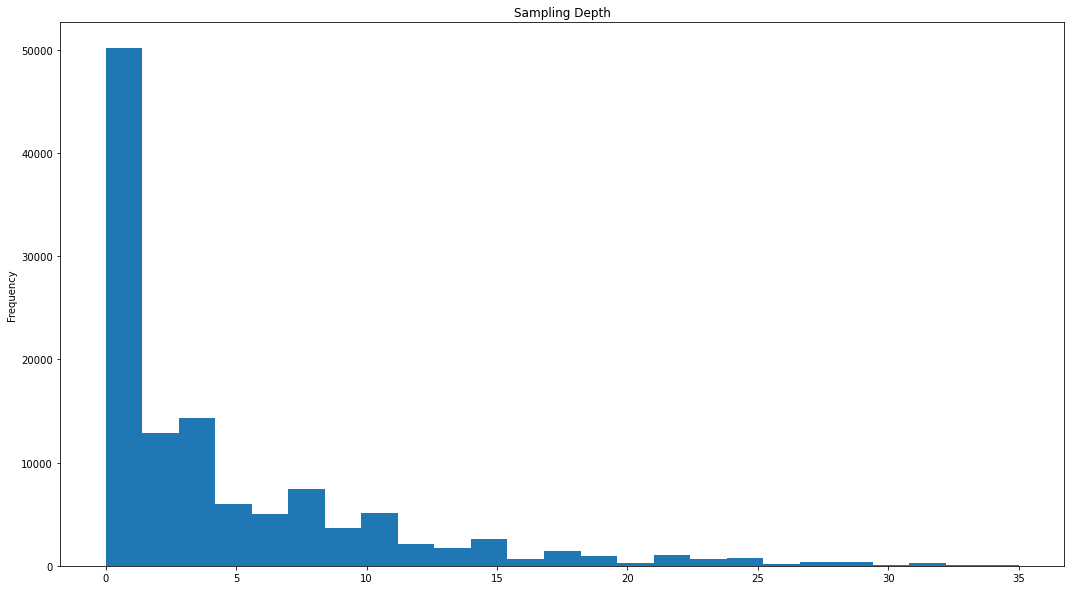

In [33]:
# plot variation in sampling depth
print("The majority of the samples were taken in water shallower than 5 meters.")
temp_data['SampleDepth'].plot(kind='hist', bins=25, 
                              title="Sampling Depth",
                              figsize=(18,10));

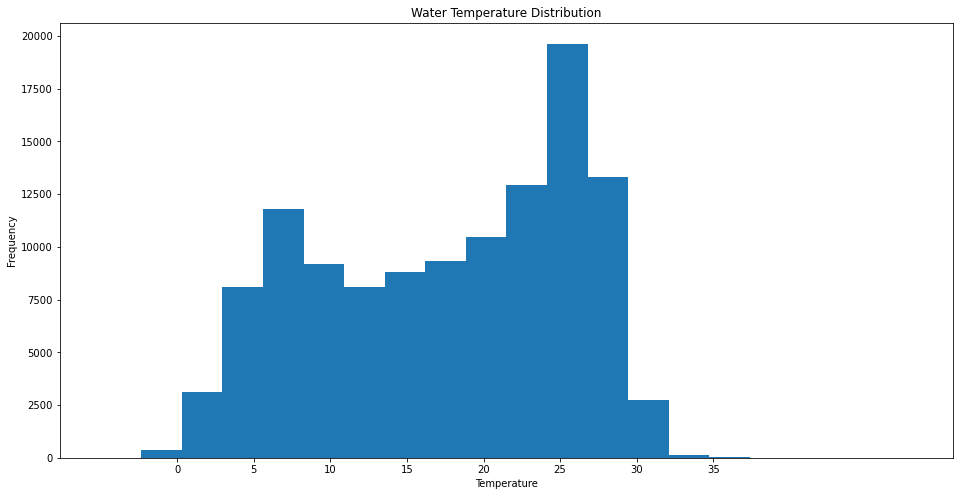

In [34]:
# plot variation in water temperature (histogram)
plt.figure(figsize=(16, 8))
plt.title('Water Temperature Distribution')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.xticks(ticks=range(0, 40, 5))
plt.hist(temp_data['MeasureValue'],
         bins=20);


In [50]:
temp_data = temp_data.sort_values(by='Date')

TypeError: 'Series' object is not callable

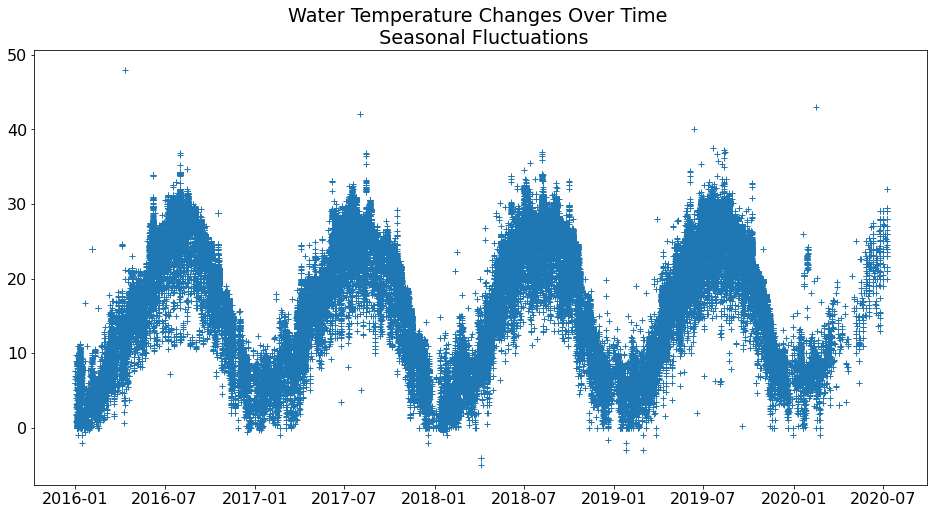

In [62]:
# plot water temperature changes over time - inspect seasonal fluctuations
plt.figure(figsize=(16, 8))
plt.title('Water Temperature Changes Over Time \n Seasonal Fluctuations')
plt.plot(temp_data['Date'],
         temp_data['MeasureValue'], '+')

data_by_year = temp_data.groupby(by=temp_data['Date'].dt.year())
plt.plot(temp_data['Date'].dt.year.unique(),
         data_by_year['MeasureValue'].mean(),
         color='red');

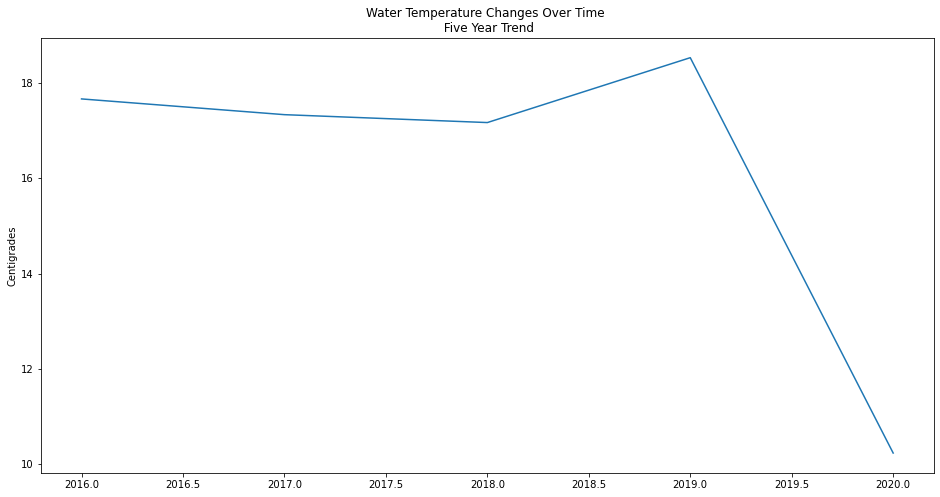

In [37]:
# plot water temperature changes over time - inspect seasonal fluctuations
data_by_year = temp_data.groupby(temp_data['Date'].dt.year)
plt.figure(figsize=(16, 8))
plt.title('Water Temperature Changes Over Time \n Five Year Trend')
plt.ylabel('Centigrades')
plt.plot(temp_data['Date'].dt.year.unique(),
         data_by_year['MeasureValue'].mean()
        );

**Note!!!** Check why did the average temperature drop from above 18 to 10C from 2019 to 2020

**Plot Geo-Location of Sampling Stations**<br>
Source: [Grace Kim: Getting started with geo-spatial data in Python](https://github.com/oceanspace/DatabricksHackathon/blob/master/WiDS_Tutorial/Python_Geospatial_WiDS.ipynb)

In [38]:
# make a geo-dataframe
geo_temp = geo.GeoDataFrame(temp_data, 
                                  geometry=geo.points_from_xy(temp_data.Longitude, temp_data.Latitude))

In [39]:
geo_temp.head()

,Date,DateLong,Latitude,Longitude,HUCNAME_,StationName,MeasureValue,Unit,SampleDepth,geometry
193042,2016-01-01,2016-01-01 12:00:00,39.740386,-77.519908,Red Run,RRP,6.0,deg C,0.3,POINT (-77.51991 39.74039)
77710,2016-01-01,2016-01-01 12:00:00,40.826680,-78.111100,Laurel Run-Bald Eagle Creek,LAURRU001,6.5,deg C,0.3,POINT (-78.11110 40.82668)
77711,2016-01-01,2016-01-01 12:00:00,40.947150,-77.828550,Wallace Run,WALLRU002,6.0,deg C,0.3,POINT (-77.82855 40.94715)
2334916,2016-01-01,2016-01-01 10:20:00,39.676280,-78.041940,Lanes Run-Licking Creek,NaN,7.0,DEG C,0.3,POINT (-78.04194 39.67628)
2339234,2016-01-01,2016-01-01 11:47:00,39.716050,-77.825050,Rockdale Run-Conococheague Creek,NaN,7.6,DEG C,0.3,POINT (-77.82505 39.71605)


In [40]:
geo_temp.tail()

,Date,DateLong,Latitude,Longitude,HUCNAME_,StationName,MeasureValue,Unit,SampleDepth,geometry
135234,2020-07-08,2020-07-08 09:01:00,38.984840,-77.002770,Northwest Branch Anacostia River,SC.2,23.0,deg C,0.3,POINT (-77.00277 38.98484)
135235,2020-07-08,2020-07-08 09:10:00,38.934310,-76.938800,Lower Anacostia River,BWP.1,26.0,deg C,0.3,POINT (-76.93880 38.93431)
135236,2020-07-08,2020-07-08 09:48:00,38.919160,-76.905660,Lower Anacostia River,LBC.1,24.0,deg C,0.3,POINT (-76.90566 38.91916)
135238,2020-07-08,2020-07-08 10:17:00,38.982310,-76.963760,Northwest Branch Anacostia River,NWB.1,24.0,deg C,0.3,POINT (-76.96376 38.98231)
25718,2020-07-08,2020-07-08 10:48:00,38.712452,-77.074172,Little Hunting Creek-Potomac River,PR-13 Little Hunting Creek,26.5,deg C,0.3,POINT (-77.07417 38.71245)


In [41]:
# import a map of US states
fid=urllib.request.urlretrieve("https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json",
                               "/tmp/gz_2010_us_040_00_500k.json") 
us_states = geo.read_file(fid[0])

# code copied from https://github.com/oceanspace/DatabricksHackathon/blob/master/WiDS_Tutorial/Python_Geospatial_WiDS.ipynb

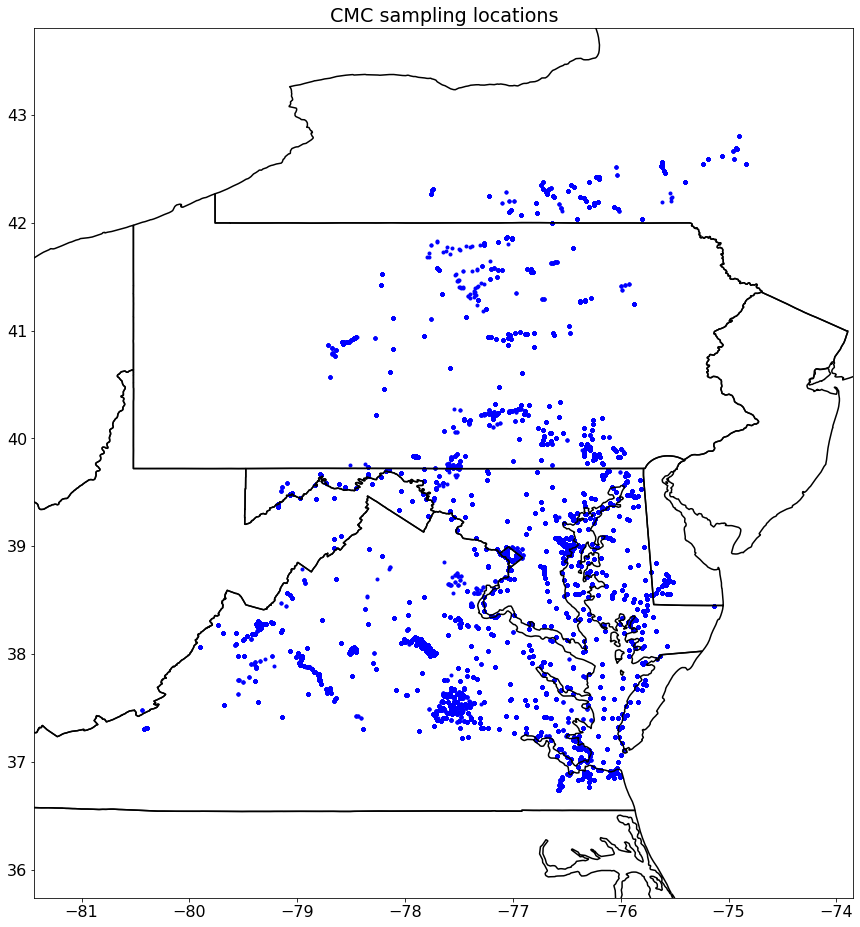

In [42]:
# make a map of sampling locations

plt.rcParams.update({'font.size': 16})

ax = us_states.boundary.plot(color='black',figsize=[20,16])

geo_temp.plot(ax=ax, color='blue',marker='.')

minx, miny, maxx, maxy = geo_temp.total_bounds
ax.set_xlim(minx-1, maxx+1)
ax.set_ylim(miny-1, maxy+1)
ax.set_title('CMC sampling locations')

plt.show()

# code modified from https://github.com/oceanspace/DatabricksHackathon/blob/master/WiDS_Tutorial/Python_Geospatial_WiDS.ipynb

**Plot Temperature Measurements**

In [43]:
# check measurement units
print("Number of NaN:", water_temp['Unit'].isnull().sum())
temp_data['Unit'].value_counts()

# all temperature measurments are in Centigrades

Number of NaN: 0


DEG C    94340
deg C    23758
Name: Unit, dtype: int64

In [44]:
temp_data.shape

(118098, 10)

In [45]:
# check if values in DateLong column are unique
temp_data['DateLong'].nunique()

# the dataframe only has 29225 unique timestamps compared to the 118098 observations
# ==> it is not possible to set the DateLong column as the index column

29225

In [46]:
# data collection locations
temp_data['HUCNAME_'].value_counts()

Upper Chesapeake Bay                   18378
Lower Chesapeake Bay                   14023
Severn River-Frontal Chesapeake Bay     3498
Round Bay-Severn River                  2083
Sarah Creek-York River                  1918
                                       ...  
Sweet Root Creek-Town Creek                1
Ninemile Run                               1
Upper South River                          1
Lake Jackson-Occoquan River                1
Wylie Brook                                1
Name: HUCNAME_, Length: 557, dtype: int64

In [47]:
# 

In [48]:
# plot time fluctuations in temperature

In [49]:
# plot measure values - histogram
# plot time fluctuations in temperature
# plot relationship between temperature, depth, 
# plot station name and temperature
# plot temperature change over time by station name

In [ ]:
# Clay's code
def make_parameters(df):
    dums = pd.get_dummies(df['Parameter'], prefix = 'Parameter')
    df = pd.concat([df,dums], axis = 1).drop(columns = 'Parameter')
    param_cols = []
    for col in df:
        if col.startswith('Parameter'):
            param_cols.append(col)
    for col in param_cols:
        df[f'{col}'].where(df[f'{col}'] == 0, 
                           df['MeasureValue'], inplace = True)
    df.drop(columns = 'MeasureValue', inplace = True)
    df = df.groupby(by = [df.index, 'SampleId','SampleDepth']).max()
    df.reset_index(level = ['SampleId', 'SampleDepth'], inplace = True)
    return df

In [64]:
# water temp problems
recent['Problem'].value_counts()

QQ    3918
NV    1251
V      428
F      371
GG     306
JJ     271
E      222
WW     180
FF      61
X       51
C       23
B       21
I       18
P       14
V        9
MM       9
A        7
TP       6
D        6
SS       5
C        4
NQ       4
E        2
AA       2
X        2
A        2
DD       2
R        1
Name: Problem, dtype: int64